# PROBLEM 5

In [2]:
#Importing libraries
import numpy as np
import cvxpy as cp
import scipy
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import imageio

def dct2(x): #functions for discrete cosine transform and inverse-dct
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

In [13]:
def solution(Ainv,y,C): #making the function for optimizing using different data
    s = cp.Variable((Ainv.shape[0],1))
    objective = cp.Minimize(cp.norm(s,1))
    constraints = [y-C@s==0]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.OSQP,verbose=True)
    return s.value #optimal s

(100, 100, 3)


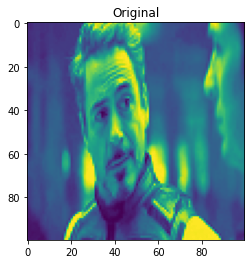

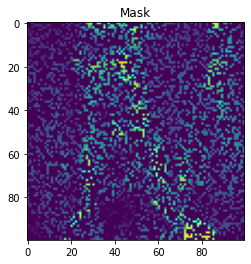

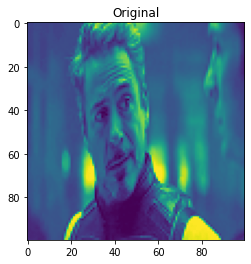

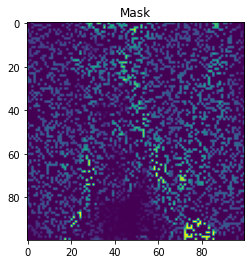

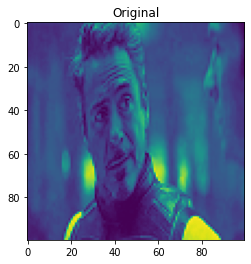

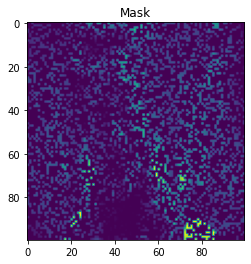

In [14]:
#Corrupting the original image one channel at a time(RGB)(70% in this case)


path_to_your_image="C:/Users/Prateek/Downloads/tonyst.png"
zoom_out=0.9999999 #Fraction of the image you want to keep.
corruption=0.7#Fraction of the pixels that you want to discard
#%% Get image and create y

# read original image and downsize for speed
Xorig =imageio.imread(path_to_your_image,as_gray=False, pilmode="RGB") # read in grayscale
print(Xorig.shape)
#Downsize image 
corruption=1-corruption
X = spimg.zoom(Xorig[:,:,0], zoom_out)
ny,nx= X.shape
k = round(nx * ny * corruption) 
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
#LOOPING FOR THE THREE CHANNELS
for i in range(3):
    X = spimg.zoom(Xorig[:,:,i], zoom_out)

    # extract small sample of signal
    b = X.T.flat[ri]
    b = np.expand_dims(b, axis=1)
    #%% CREATE A inverse and C
    # *******************************************************************************************
    """This part consumes a lot of memory. Your PC might crash if the images you load are larger than 100 x 100 pixels """
    # create dct matrix operator using kron (memory errors for large ny*nx)
    Aa = np.kron(
        np.float16(spfft.idct(np.identity(nx), norm='ortho', axis=0)),
        np.float16(spfft.idct(np.identity(ny), norm='ortho', axis=0))
        )
    A = Aa[ri,:] # same as B times A
    # *******************************************************************************************
    # create images of mask (for visualization)
    mask = np.zeros(X.shape)
    mask.T.flat[ri] = True
    mask[mask==0]=False
    masked=X*mask
    Xm = 255 * np.ones(X.shape)
    Xm.T.flat[ri] = X.T.flat[ri]
    #%%
    plt.imshow(X)
    plt.title("Original")
    plt.show()

    plt.imshow(masked.astype('uint8'))
    plt.title("Mask")
    plt.show()
    #%% SAVE MATRICES TO DRIVE
    import os
    dir_name='C:/Users/Prateek/Downloads/Group13/dataforassignment'
    try:
        os.mkdir(dir_name)
    except Exception as e:
        pass

    np.save(dir_name+'/C'+ str(i)+'.npy',A)
    np.save(dir_name+'/A_inv'+ str(i)+'.npy',Aa)
    np.save(dir_name+'/y'+ str(i)+'.npy',b)
    plt.imsave(dir_name+'/incomplete'+ str(i)+'.png',Xm)
    plt.imsave(dir_name+'/original_with_crop'+ str(i)+'.png',X)

In [5]:
recons=np.zeros((100,100,3))
for i in range(3):
    abcd =imageio.imread('C:/Users/Prateek/Downloads/Group13/dataforassignment/incomplete'+ str(i)+'.png',pilmode='L')
    recons[:,:,i]=abcd #corrupted image rgb

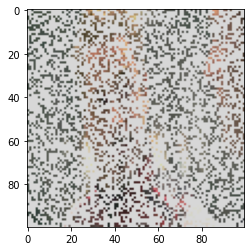

In [6]:
#corrupted rgb image
plt.imshow(recons.astype('uint8'))
np.save('C:/Users/Prateek/Downloads/Group15/dataforassignment/corruptedtony.npy',recons)

In [23]:
def normalize(x):  #function to normalize the values of image data
    return ((x - np.min(x)) / (np.max(x) - np.min(x)))

In [18]:
#finding optimal s (USING CONVEX OPTIMIZER) for three different channels of the image (RGB)
for i in range(3):
    A=np.load('C:/Users/Prateek/Downloads/Group13/dataforassignment/A_inv'+str(i)+'.npy')
    c=np.load('C:/Users/Prateek/Downloads/Group13/dataforassignment/C'+str(i)+'.npy')
    Y=np.load('C:/Users/Prateek/Downloads/Group13/dataforassignment/y'+str(i)+'.npy')
    ss=solution(A,Y,c)
    np.save('C:/Users/Prateek/Downloads/Group13/dataforassignment/s'+str(i)+'.npy',ss)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Nov 02 08:27:51 PM: Your problem has 10000 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 02 08:27:51 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 02 08:27:51 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 02 08:27:51 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 02 08:27:51 PM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 02 08:27:51 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuff

(CVXPY) Nov 02 09:05:32 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 02 09:05:32 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 02 09:05:32 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 02 09:05:32 PM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 02 09:05:32 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Nov 02 09:05:32 PM: Applying reduction CvxAttr2Constr
(CVXPY) Nov 02 09:05:32 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Nov 02 09:05:32 PM: Applying reduction QpMatrixStuffing
(CVXPY) Nov 02 09:05:42 PM: Applying reduction OSQP
(CVX

In [28]:
#using idct to reconstruct image
recons1=np.zeros((100,100,3))
for i in range(3):   #reconstruction for the three channels
    sss=np.load('C:/Users/Prateek/Downloads/Group13/dataforassignment/s'+str(i)+'.npy')
    a=list(sss)
    a=np.array(a)
    sresh=np.reshape(a,(100,100))
    arec=normalize(idct2(sresh))
    recons1[:,:,i]=arec.T

In [31]:
dir_name='C:/Users/Prateek/Downloads/Group13/dataforassignment'
plt.imsave(dir_name+'/tony2.png',recons1)

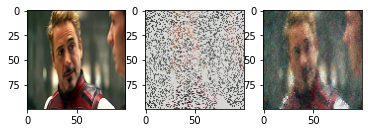

In [14]:
plt.subplot(1,3,1) #comparison of reconstructed and original image and corrupted image
plt.imshow(Xorig)
plt.subplot(1,3,2)
plt.imshow(recons.astype('uint8'))
plt.subplot(1,3,3)
plt.imshow(recons1)